# Homework 6: Exploring Study Reflection Responses 🗞

Name: Tara Renduchintala

Student ID: 475586

Collaborators:


## Instructions

In this homework, we will be reviewing the exploratory data analysis (EDA) process. It might be helpful to review **Lab 2 (Analyzing the MoMA Data)** first. Most of the things we ask you to do in this homework are explained in the lab. In general, you should feel free to import any package that we have previously used in class. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, a legend).

Additionally, note that this homework will have a slightly different structure than in the past. One of the reasons why Jupyter Notebooks are so popular in the field is because you can really treat them like notebooks to explain your findings as you discover them. In this assignment, we provide some **Problem** stubs following the EDA process and you will need to fill in the analysis and structure as you go.

Furthermore, in addition to recording your collaborators on this homework, please also remember to cite/indicate all external sources used when finishing this assignment. This includes peers, TAs, and links to online sources. Note that these citations will not free you from your obligation to submit your _own_ code and write-ups, however, they will be taken into account during the grading and regrading process.

### Submission instructions
* Submit this python notebook including your answers in the code cells as homework submission.
* **Feel free to add as many cells as you need to** — just make sure you don't change what we gave you. 
* **Does it spark joy?** Note that you will be partially graded on the presentation (_cleanliness, clarity, comments_) of your notebook so make sure you [Marie Kondo](https://lifehacker.com/marie-kondo-is-not-a-verb-1833373654) your notebook before submitting it.

## 1. Introduction

For our EDA this week, we'll take a look at _anonymized_ exam study reflection responses. You will find a blank copy of the reflection survey in `utility/data` along with a CSV containing the data and a README.txt file that explains what each value represents. Our goal will be to use this dataset to gain some insight about how students study and _perhaps_ find some patterns in this data.

In general, we will be following the EDA process:
1. Get the data and gain **basic understanding**
2. **Wrangle** the data
3. **Profile** the data
4. Develop questions to investigate (form a **hypotheses**)
5. Use the data to **investigate** hypothesis
6. **Summarize** results and answer questions 

## 2. Getting Familiar with the Data

In this section, we will get a feel for our data and tidy it up so that we can analyize it later.

### Problem 1

Let's take a look at the files in `utility/data` and think about what we can and will need to do with it.

**Write-up!** Describe the data in `MidtermStudyReflection.csv`, answering questions including, but not limited to, these: How many examples and features does the dataset have? What kinds of features are in the dataset? What values can these features take?
> `Hint` Consider the steps of EDA; what would you like to know about this dataset. 

### Problem 2

Let's do some data wrangling. Considering your description of the dataset from [Problem 1](#Problem-1), how should we clean this data?

In the cells below, explain and perform the steps that you need to prepare this data for further analysis. Make sure that your analysis and work is presented well and effectively communicates your work. 
> `Hint` While our labs are not perfect, you can use them as an example of how you might do this. 
Also, you might want to come back to this step later on, since you might encounter problems with the data once you actually analyze it. Remember, you may add as many cells (for code and text) as you need below. Here — we gave you one for free!

In [66]:
# this one is free!
from os.path import exists

#Importing the data into the assigment
data_dir = 'utility/data'

assert exists(f'{data_dir}/MidtermStudyReflection.csv'), 'Midterm data file is missing.'

import pandas as pd

data = pd.read_csv(f'{data_dir}/MidtermStudyReflection.csv')

data.head()

#Get rid of scores that are not possible (ie. -1)
data = data[data["Midterm Score"] >= 0]

#Rename the columns so it is easier to parse
data.columns = ["Midterm Score", "Reviewing Slides", "Attending Lecture", "Taking Lecture Notes", "Reviewing Lecture Notes", "Completing Assigned Readings", "Attending a Study Group", "Talking with a Professor/TA"
        , "Reviewing Homeworks", "Reviewing Labs", "Studying with another Person", "Reviewing Past Quizzes", "Completing Worksheet Problems", "Studying with a group/friends", "Studying Alone", "Hours studied", "Study with tutor/non-class student",
             "Hardest Concept", "Days Before", "Why was it hard?"]
data.head()


#Drop the explanation of why it was hard because it was optional to answer and does not give us any more information on midterm score. It gives information on what
#to clarify for next year but does not factor as heavily into the grades as if they talked with a professor/TA they might have found the concept less difficult. 

not_interested = ["Hardest Concept", "Why was it hard?"]
data = data.drop(not_interested, axis=1)


#Group data by midterm score and get average of all the features



#Combine anything to do with lecture and lecture notes by taking their average to see how lecture in general impacted grade
data["Lecture"] = ((data["Attending Lecture"] + data["Taking Lecture Notes"] + data["Reviewing Lecture Notes"])/3).round(2)

#Combine anything to do with studying in a group/with friends/other students to see how group studying in general impacted the grade
data["Study with Others"] = ((data["Attending a Study Group"] + data["Studying with another Person"] + data["Studying with a group/friends"] + data["Study with tutor/non-class student"])/4).round(2)

#Drop the combined columns
not_interested_2 = ["Attending Lecture", "Taking Lecture Notes", "Reviewing Lecture Notes", "Attending a Study Group", "Studying with another Person", "Studying with a group/friends", "Study with tutor/non-class student" ]
data = data.drop(not_interested_2, axis = 1)
data.head()



,Midterm Score,Reviewing Slides,Completing Assigned Readings,Talking with a Professor/TA,Reviewing Homeworks,Reviewing Labs,Reviewing Past Quizzes,Completing Worksheet Problems,Studying Alone,Hours studied,Days Before,Lecture,Study with Others
0,59.5,2,1,1,2,4,1,5,5,2.0,5,3.33,1.50
1,81.0,1,1,1,1,1,1,1,5,0.0,0,1.00,1.00
2,72.5,5,1,2,3,4,4,1,4,6.0,1,1.67,2.25
3,74.5,4,1,1,3,3,1,3,4,5.0,1,4.00,1.75
4,67.5,3,1,3,4,3,2,4,5,5.0,4,2.33,1.00


### Problem 3

Now that we cleaned up our data, we are ready to look into it. In this problem, we want to profile our data and explore single variables.
> `Hint` Note that the way the data is stored does not necesarily mean that each column should correspond to a seperate variable. Feel free to define your own variables based on the input data. Looking at the study reflection form might be helpful to figure out meaningful representations. Also note that there is no right or wrong representation here (since it is your job to find something interesting in the data, it is also up to you to choose  the data representation). Again, you might want to iterate over this step again later after doing some more exploration. 

Recall from Lab 2, this step usually involves computing summary statistics and basic plots _where applicable_. Try plotting some of the data (with appropriate plots). Then, highlight a few of the more interesting ones and discuss why you thought they were interesting — for both our sakes, **please only include the most interesting ones** in your actual submission. 

Once again, we have provided a _free_ cell for you to use; make as many as you need. Use text cells to describe what you are doing and what your findings are. 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


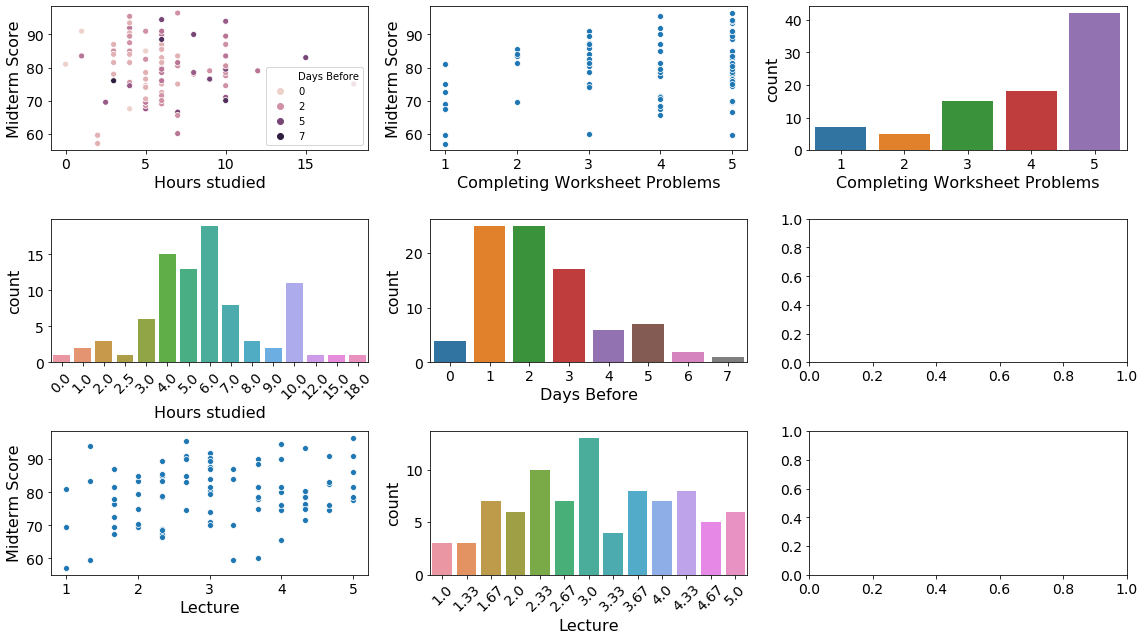

In [76]:
# this one is also free!
import numpy as np
import matplotlib.pyplot as plt
from utility.util import configure_plots

# this cell is free!
configure_plots()
import seaborn as sns

# your code here
# score_by_hours_studied = data[['Midterm Score', 'Hours studied', "Reviewing Labs"]].groupby(['Midterm Score'], as_index=False) 
# sns.barplot(x="Midterm Score", y="counts", hue="Hours Studied", data=score_by_hours_studied)
# plt.tight_layout()

# group by gender and education and count the number of examples
# for each pair of feature values
score_by_hours = data[['Midterm Score', 'Hours studied', 'Days Before']] \
    .groupby(['Midterm Score', 'Hours studied'], as_index=False) \
    .aggregate('count')

# after aggregation, all columns other than the ones used to group will have
# the same values. here we included `Status` as a placeholder column which
# now holds counts, so should be renamed.

score_by_hours = score_by_hours.rename({'Days Before': 'counts'}, axis=1)


# your code here
#sns.barplot(x="Hours studied", y="counts", hue="Midterm Score", data=score_by_hours)
fig, ax =plt.subplots(3,3)
sns.scatterplot(x="Hours studied", y="Midterm Score", hue="Days Before", data=data, ax=ax[0][0])
sns.scatterplot(x="Completing Worksheet Problems", y="Midterm Score", data=data, ax=ax[0][1])
sns.countplot(x="Completing Worksheet Problems", data = data, ax=ax[0][2])
hours_count = sns.countplot(x="Hours studied", data = data, ax=ax[1][0])
days_before_count = sns.countplot(x="Days Before", data = data, ax = ax[1][1])
sns.scatterplot(x="Lecture", y="Midterm Score", data=data, ax=ax[2][0])
lectures_count = sns.countplot(x="Lecture", data = data, ax=ax[2][1])

hours_count.set_xticklabels(hours_count.get_xticklabels(), rotation=45)
lectures_count.set_xticklabels(lectures_count.get_xticklabels(), rotation=45)
fig.show()
plt.tight_layout()


It looks as though people relied heavily on reviewing slides for the midterm. However, among the people who relied heavily on the slides to review for the midterm, there also seems to be a distribution of grades. Additionally, it seems that there was a spread on the importance placed on studying labs. It seems as though a majority of the students placed heavy to somewhat heavy importance. The relation between heavy importance to medium importance on the midterm scores appears to lead to better exam scores. However, this does not prove that one cannot do well without reviewing labs as quite a few people did not place importance on the labs and still ended up with high exam scores. 

When looking at hours studied in correlation to the midterm score, It appears as though the people who studied for a greater length of days prior to the exam ended up recieving lower scores. However, the people who studied around 2 days before the exam ended up reciving higher scores. Furthermore, It seems as though most people stuided in the range of 3 hours to 10 hours -- Most doing around 6 hours spread out over the course of 1-3 days. 

A lot of people also placed emphasis on completing worksheet problems. It is evident that there is a correlation between placing more emphasis on the worksheet problems and midterm score as the more people who placed medium to heavy emphasis on the worksheet problems seemed to do better on the midterm.

What was most interesting to me was that there was a lot of variation on the emphasis placed on lectures. This included reviewing lectures, attending lecutres, and taking lecture notes. However, there seemed to be a positive correlation with placing emphasis on lectures and doing well on the midterm. Most people that placed heavy emphasis on the lectures scored quite highly on the exam.

## 3. Asking the Hard Questions

By now we should know all of the ins and outs about this dataset (right?). Let's dive a little deeper into it and see if we can find anything interesting.

### Problem 4

As you worked through the initial phase our this homework, did anything catch your interest? Let's formulate some questions and hypotheses that you could explore in depth.

**Write-up** Formulate and describe a question and a hypothesis to answer it. What inspired your idea (provide specifics from [the last section](#2.-Getting-Familiar-with-the-Data), if any)? How can you use the data to support or reject your hypothesis?

### Problem 5

Let's explore your hypothesis. Find evidence from the data that supports or refutes your hypothesis and present it — recall that as a data scientist, one of you're goals is to discover and communicate your results to your audience, _me_. The more thorough your analysis, the better!

Here's yet another _free_ cell; use as many as you need.

-0.21546699552011828
9.102435582191985


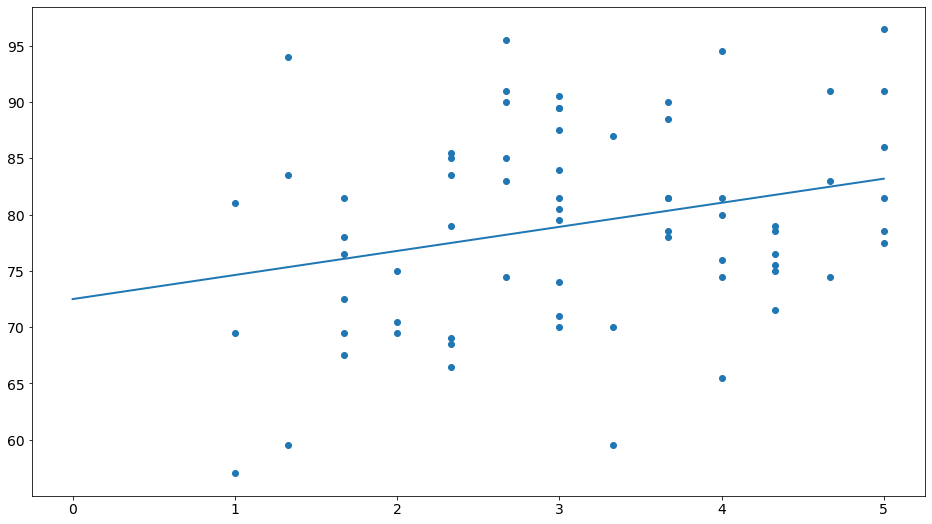

In [121]:
# woah! these things are falling from the sky or something
target = 'Midterm Score'
X, y = data.loc[:, data.columns == 'Lecture'], data[target]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=3)

x_star = np.linspace(0, X_train.max(), 1000)
model.fit(X_train, y_train)
y_pred = model.predict(x_star)

plt.scatter(X_train, y_train)
plt.plot(x_star, y_pred)

Y_pred = model.predict(X_test)


# Evaluate predictions
rmse = np.sqrt(mean_squared_error(y_test, Y_pred))

rsquared = model.score(X_test, y_test)
f'RSquared: {rsquared}'
f'RMSE: {rmse}'
print(rsquared)
print(rmse)

### Problem 6

Did you find anything interesting in [Problem 5](#Problem-5)? If you did, tell me about it. Can you make any recommendations for us? What might we try to improve the class? Don't worry if you didn't anything — you should still tell us about what you found (negative results are results too!).

It would be lovely if you could provide links to key figures in your discussion. See [this StackOverflow question](https://stackoverflow.com/questions/28080066/how-to-reference-a-ipython-notebook-cell-in-markdown) for details.

### Problem 7

One last step that we shouldn't skip is reviewing the data acquisition method. There are often times where the data you need doesn't exist and you need to go collect it. As you probably already know, making surveys is an art and we would like to here how you might change it to collect better or more information in the future. 
> `Hint` You could discuss something like this: Based on your analysis of the data set, which features were informative and which weren't? What information that was missing from this survey do you think would be helpful to have for next time?

And that's it! Remember to review your work and make sure it is well presented and organized. Not everyting you coded up needs to remain in your submission. **[Does [this cell] spark joy?](https://i.kinja-img.com/gawker-media/image/upload/s--iW_3HGbT--/c_scale,dpr_2.0,f_auto,fl_progressive,q_80,w_800/oruf4oavtj5vpmvaquew.jpg)** You are always trying to communicate your findings to somebody, _maybe even yourself_.